<a href="https://colab.research.google.com/github/andreeo/computer-vision/blob/main/application_sunglass_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Application: Sunglass Filter

#Load the Face and sunglass Image
First of all, we will need the two images:

1. Image of Elon Musk (or someone).
2. A png image of a sunglass (or accessory) with an alpha channel.

Let us load the images and have a look at them.

#Import Libraries

In [2]:
#import libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap']  = 'gray'
matplotlib.rcParams['image.interpolation'] = 'bilinear'

# Import Data

In [3]:
from google.colab import drive
drive.mount('/content/drive')

!unzip -qq drive/MyDrive/opencv-data/week1_python.zip  -d  /content/week1_python

Mounted at /content/drive
mapname:  conversion of  failed


In [4]:
imagePath = "/content/week1_python/data/images/"

# Coding

Sunglass dimension = (136, 314, 4)


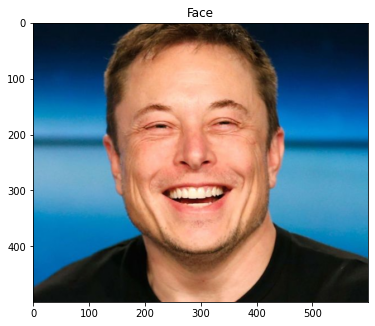

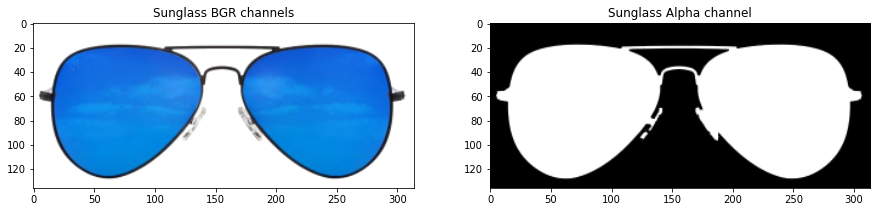

In [5]:
#load the face image
faceImagePath =  imagePath +  "musk.jpg";
faceImage = cv2.imread(faceImagePath);
faceImage = np.float32(faceImage)/255

plt.imshow(faceImage[:,:,::-1]);plt.title("Face");

#load the sunglass image
sunglassImagePath = imagePath + "sunglass.png"
glassPNG = cv2.imread(sunglassImagePath, -1); #we put  IMREAD_UNCHANGED  because we want read the transparent part of the image
glassPNG = np.float32(glassPNG)/255


#resize the image to fit over the eye region
glassPNG = cv2.resize(glassPNG, None, fx=0.5, fy=0.5)
glassHeigh, glassWidth, nChannels =  glassPNG.shape
print("Sunglass dimension = {}".format(glassPNG.shape))

#separete the color  and alpha channels
glassBGR = glassPNG[:,:,0:3]
glassMask1 = glassPNG[:,:,3]

#display the images for  clarity

plt.figure(figsize=[15,15]);
plt.subplot(121);plt.imshow(glassBGR[:,:,::-1]);plt.title("Sunglass BGR channels");
plt.subplot(122);plt.imshow(glassMask1);plt.title("Sunglass Alpha channel");

#Using Naive Replace

Replace the eye region with that of the sunglass.


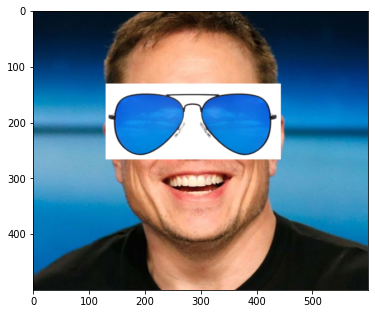

In [43]:
#top left corner of the glasses
glass_topLeftRow = 130
glass_topLeftCol = 130

glass_bottomRightRow = glass_topLeftRow + glassHeigh
glass_bottomRightColumn = glass_topLeftCol + glassWidth

#make a copy
faceWithGlassesNative  = faceImage.copy()

#replace the eye region with the  sunglass image

faceWithGlassesNative[glass_topLeftRow:glass_bottomRightRow, glass_topLeftCol:glass_bottomRightColumn] = glassBGR

plt.imshow(faceWithGlassesNative[:,:,::-1]);


You can see that the output is not even close. This is because the BGR image is opaque and will either have a black or white rectangle around the sunglass.

We need to use a mask along with the sunglass image in order to get the desired output

#Using Arithmetic Operations and Alpha Mask

In order to put the sunglass on top of the eye region, we need to follow these steps:

1. Create an alpha mask with 3-channels using the single channel mask.
2. Extract the eye region from the face region.
3. Multiple the Mask with the sunglass to get the masked sunglass.
4. Multiple the negative of Mask with the eye region to create a hole in the eye region for the  sunglass to be placed.
5. Add the masked sunglass and eye regions to get the combinated eye region with the sunglass.
6. Replace the eye region in the original image with that of the output we got in the previous step. This is the final output.


Text(0.5, 1.0, 'Augmented Eye and Sunglass')

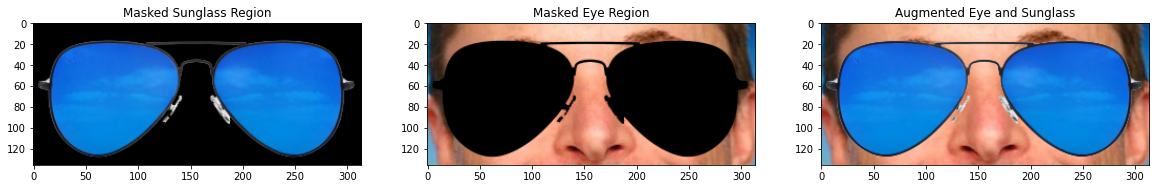

In [54]:
#step 1
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))

#step 2
faceWithGlassesArithmetic = faceImage.copy()
eyeROI = faceWithGlassesArithmetic[glass_topLeftRow:glass_bottomRightRow, glass_topLeftCol:glass_bottomRightColumn]

#step 3
maskedGlass = cv2.multiply(glassMask, glassBGR)

#step 4
maskedEye = cv2.multiply((1-glassMask), eyeROI)

#step 5
eyeRoiFinal1 = cv2.add(maskedGlass, maskedEye)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(132);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(133);plt.imshow(eyeRoiFinal1[...,::-1]);plt.title("Augmented Eye and Sunglass")

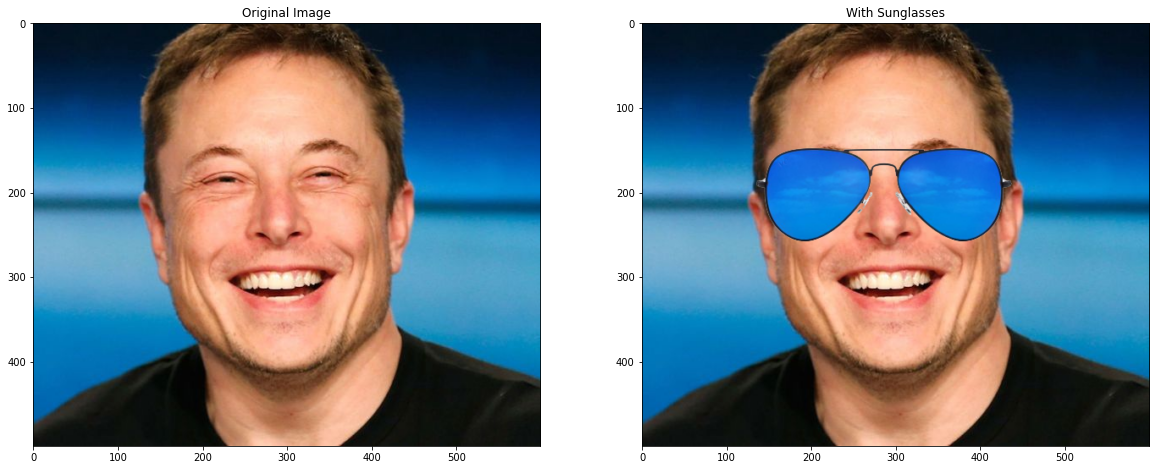

In [55]:
faceWithGlassesArithmetic[glass_topLeftRow:glass_bottomRightRow, glass_topLeftCol:glass_bottomRightColumn] = eyeRoiFinal1

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");

# Exercise

1. <font color='green'>[Easy]</font> Can you change the code slightly so the you can partially see the eyes?
2.  <font color='yellow'>[Medium]</font> Use the same logic, can you create a similar filter which can augment other objects like ear-rings, mustache etc? Try it out.
3.  <font color='red'>[Hard]</font> You can also try to come up with algorithms to automatically detect the region using computer vision techniques instead of checking the eye region manually.

## Easy


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Augmented Eye and Sunglass')

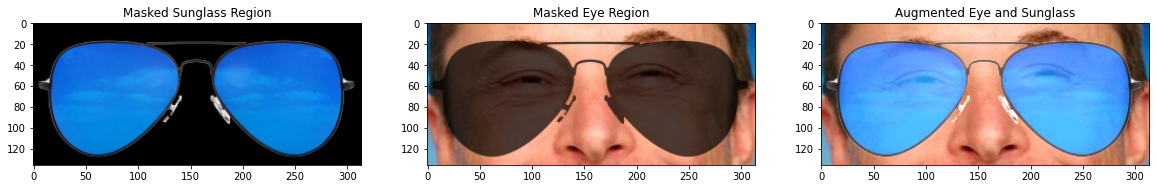

In [53]:
#step 1
glassMask = cv2.merge((glassMask1, glassMask1, glassMask1))

#step 2
faceWithGlassesArithmetic = faceImage.copy()
eyeROI = faceWithGlassesArithmetic[glass_topLeftRow:glass_bottomRightRow, glass_topLeftCol:glass_bottomRightColumn]

#step 3
maskedGlass = cv2.multiply(glassMask, glassBGR)

#step 4
#two options
#1:
maskedEye = cv2.multiply((1-glassMask*0.7), eyeROI)

#2:
#maskedEye =  cv2.addWeighted(eyeROI, 1, (0-glassMask),  0.4, 0)

#step 5
eyeRoiFinal2 = cv2.add(maskedGlass, maskedEye)

# Display the intermediate results
plt.figure(figsize=[20,20])
plt.subplot(131);plt.imshow(maskedGlass[...,::-1]);plt.title("Masked Sunglass Region")
plt.subplot(132);plt.imshow(maskedEye[...,::-1]);plt.title("Masked Eye Region")
plt.subplot(133);plt.imshow(eyeRoiFinal2[...,::-1]);plt.title("Augmented Eye and Sunglass")

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


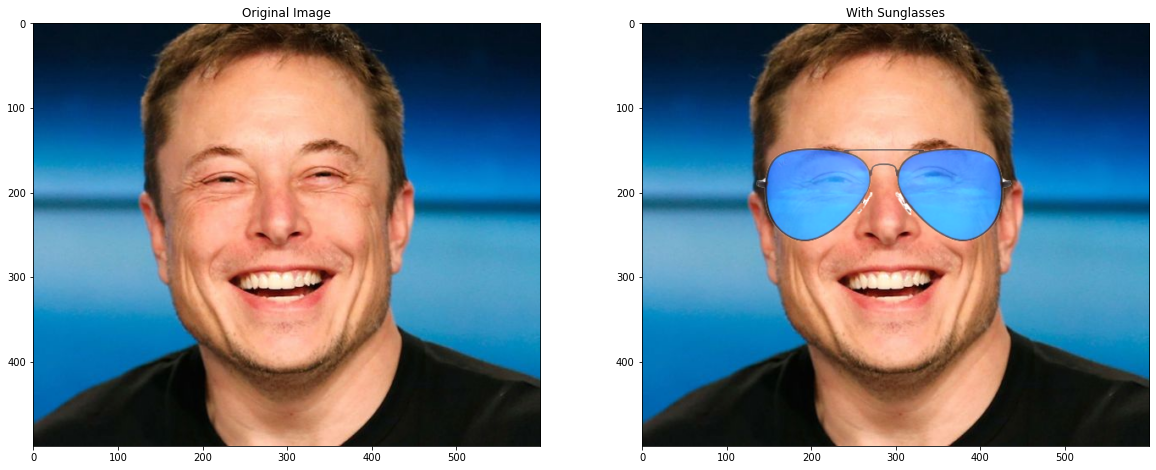

In [56]:
faceWithGlassesArithmetic[glass_topLeftRow:glass_bottomRightRow, glass_topLeftCol:glass_bottomRightColumn] = eyeRoiFinal2

# Display the final result
plt.figure(figsize=[20,20]);
plt.subplot(121);plt.imshow(faceImage[:,:,::-1]); plt.title("Original Image");
plt.subplot(122);plt.imshow(faceWithGlassesArithmetic[:,:,::-1]);plt.title("With Sunglasses");

## Medium

Beard Image Properties = (252, 300, 4)


Text(0.5, 1.0, 'Beard Alpha channel')

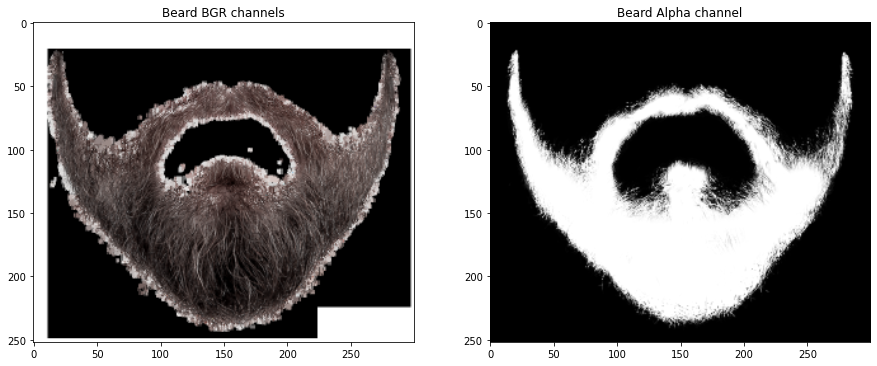

In [20]:
#read beard image
beardImagePath = "/content/beard.png"
beardImage = cv2.imread(beardImagePath, -1)
beardPNG = np.float32(beardImage)/255

#resize the image
beardPNG = cv2.resize(beardPNG, None, fx=0.5, fy=0.5)
beardHeigh, beardWidth, nChannels = beardPNG.shape
print("Beard Image Properties = {}".format(beardPNG.shape))

#separete BGR and alpha channels
beardBGR = beardPNG[:,:,0:3]
beardMask1 = beardPNG[:,:,3]

#display results

plt.figure(figsize=[15,15])

plt.subplot(121);
plt.imshow(beardBGR[:,:,::-1]);
plt.title("Beard BGR channels")

plt.subplot(122);
plt.imshow(beardMask1);
plt.title("Beard Alpha channel")

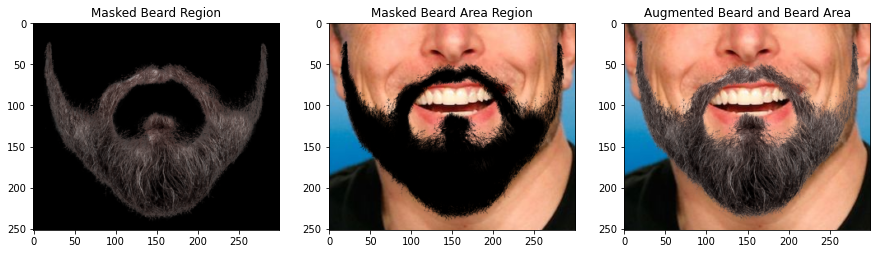

In [49]:
beard_topLeftRow = 215
beard_topLeftCol = 140

beard_bottomRightRow = beard_topLeftRow + beardHeigh
beard_bottomRightColumn = beard_topLeftCol + beardWidth 

faceWithBeard = faceImage.copy()

beardROI = faceWithBeard[beard_topLeftRow:beard_bottomRightRow, beard_topLeftCol:beard_bottomRightColumn]

beardMask = cv2.merge((beardMask1, beardMask1, beardMask1))

maskedBeard = cv2.multiply(beardMask, beardBGR)

beardArea = cv2.multiply((1-beardMask), beardROI)


beardRoiFinal = cv2.add(maskedBeard, beardArea)


plt.figure(figsize=[15,15])

plt.subplot(131);
plt.imshow(maskedBeard[:,:,::-1]);
plt.title("Masked Beard Region")



plt.subplot(132);
plt.imshow(beardArea[:,:,::-1]);
plt.title("Masked Beard Area Region");



plt.subplot(133);
plt.imshow(beardRoiFinal[:,:,::-1]);
plt.title("Augmented Beard and Beard Area");





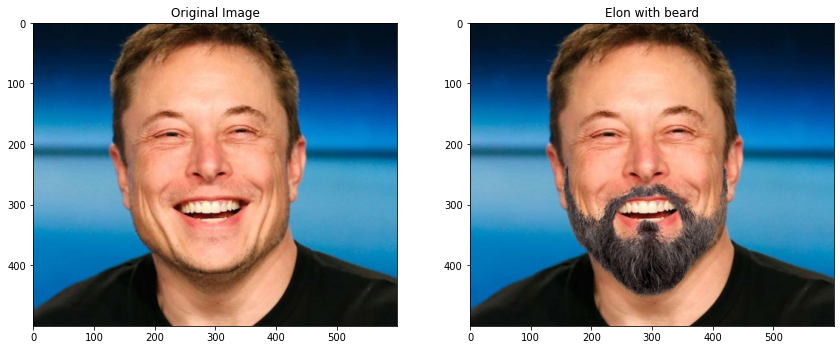

In [50]:
#replace the beard are with the above output  (Augmented Beard and BeardArea)

faceWithBeard[beard_topLeftRow:beard_bottomRightRow, beard_topLeftCol:beard_bottomRightColumn] = beardRoiFinal


#display
plt.figure(figsize=[30,30])

plt.subplot(141);
plt.imshow(faceImage[...,::-1]);
plt.title("Original Image");

plt.subplot(142);
plt.imshow(faceWithBeard[...,::-1]);
plt.title("Elon with beard");

Or with sunglass and beart :D

Text(0.5, 1.0, 'Elon with beard')

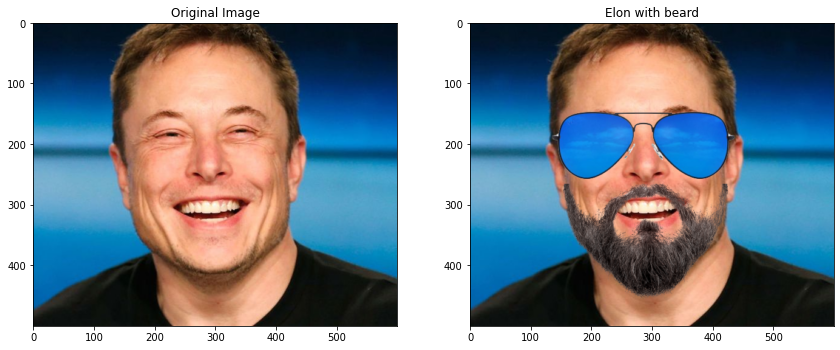

In [57]:
faceWithBeard[glass_topLeftRow:glass_bottomRightRow, glass_topLeftCol:glass_bottomRightColumn] = eyeRoiFinal1

#display
plt.figure(figsize=[30,30])

plt.subplot(141);
plt.imshow(faceImage[...,::-1]);
plt.title("Original Image");

plt.subplot(142);
plt.imshow(faceWithBeard[...,::-1]);
plt.title("Elon with beard")